In [330]:
import numpy as np
import matplotlib.pyplot as plt


In [331]:
f = lambda x, c: x*x + c
c = -1
res = 3000
max_iter = 1000
xlim = 1.2
ylim = 1.2
x = np.linspace(-xlim, xlim, res)
y = np.linspace(-ylim, ylim, res)
X,Y = np.meshgrid(x,y)
Z = X + Y*1j

In [332]:
# escMatrix = np.zeros(Z.shape, dtype=int)
escMatrix = np.full(Z.shape, max_iter, dtype=int)
escMatrix2 = np.full(Z.shape, max_iter, dtype=int)
Z2 = Z.copy()

In [334]:
for i in range(max_iter):
    radius_2 = np.abs(Z2) <=1000
    Z2[radius_2] = f(Z2[radius_2],c)
    # escMatrix[(escMatrix ==max_iter) & (~radius_2)]  = i
    just_escaped = (escMatrix ==max_iter) & (~radius_2)
    escMatrix[just_escaped]  = i    
    escMatrix2[just_escaped] = i + 1 - np.log(np.log(np.abs(Z2[just_escaped])))/np.log(2)

    

KeyboardInterrupt: 

In [335]:
#escMatrix
filledJuliaSet = (escMatrix == max_iter).astype(int)
JuliaSet = escMatrix.copy()
JuliaSet[filledJuliaSet == 1] = 0
#escMatrix2
JuliaSet2 = escMatrix2.copy()
JuliaSet2[filledJuliaSet == 1] = 0
JuliaSet2_norm = JuliaSet2 / JuliaSet2.max()


In [317]:
from matplotlib.colors import LinearSegmentedColormap


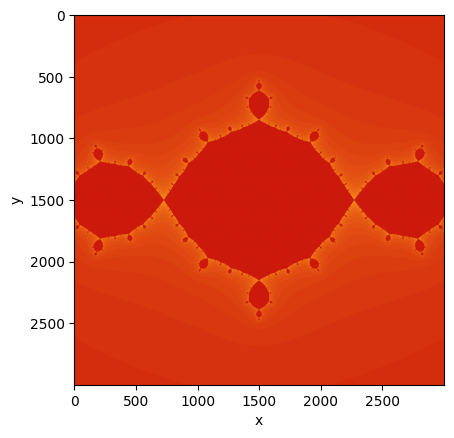

In [339]:
fig, ax = plt.subplots()

colors = [
    # (1.0, 1.0, 1.0),  # white
    # (1.0, 0.9, 0.4),  # light yellow
    (0.8, 0.1, 0.05), # red
    (1.0, 0.6, 0.1),  # orange
    (0.0, 0.0, 0.0)   # black (interior)
]
cmap = LinearSegmentedColormap.from_list("mec", colors, N=512)
ax.imshow(JuliaSet,cmap=cmap)

# ax.imshow(filledJuliaSet,cmap='binary', alpha=filledJuliaSet*0.99)
# ax.imshow(np.ma.masked_where(filledJuliaSet==0,filledJuliaSet),cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Computing Julia set for c = (-1+0j)


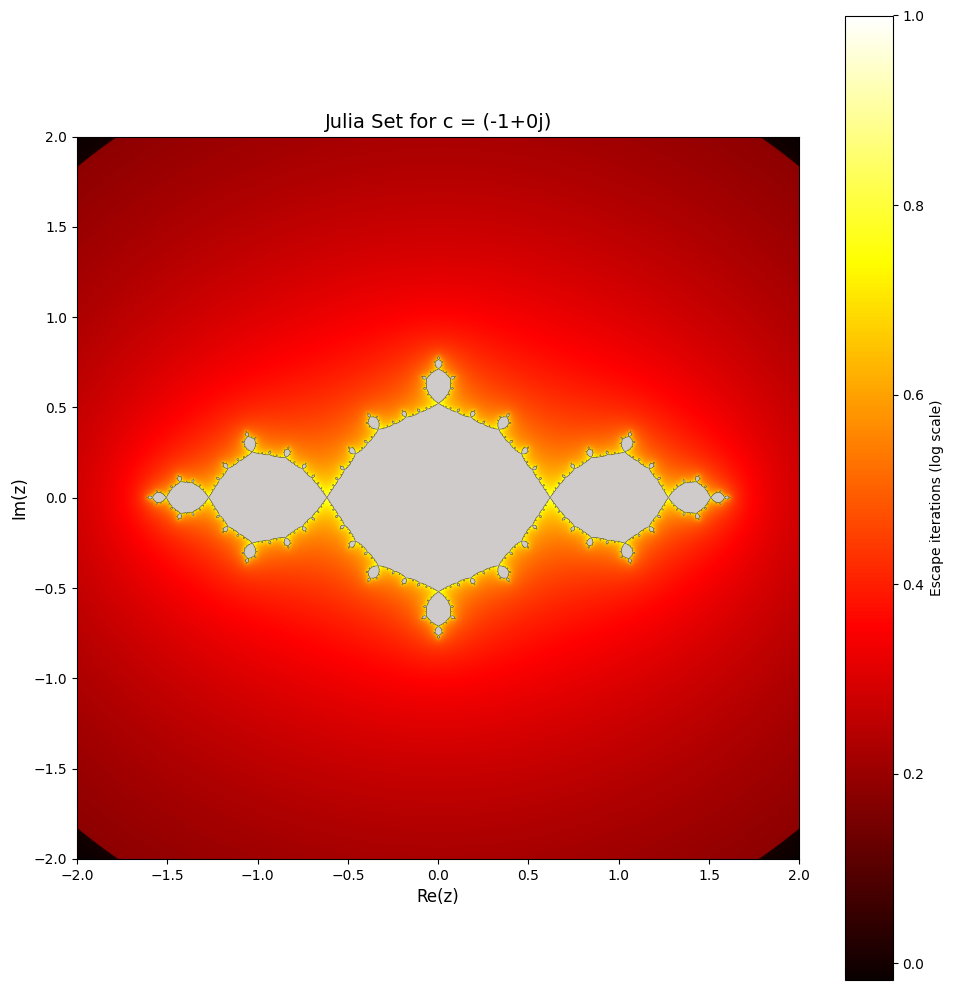

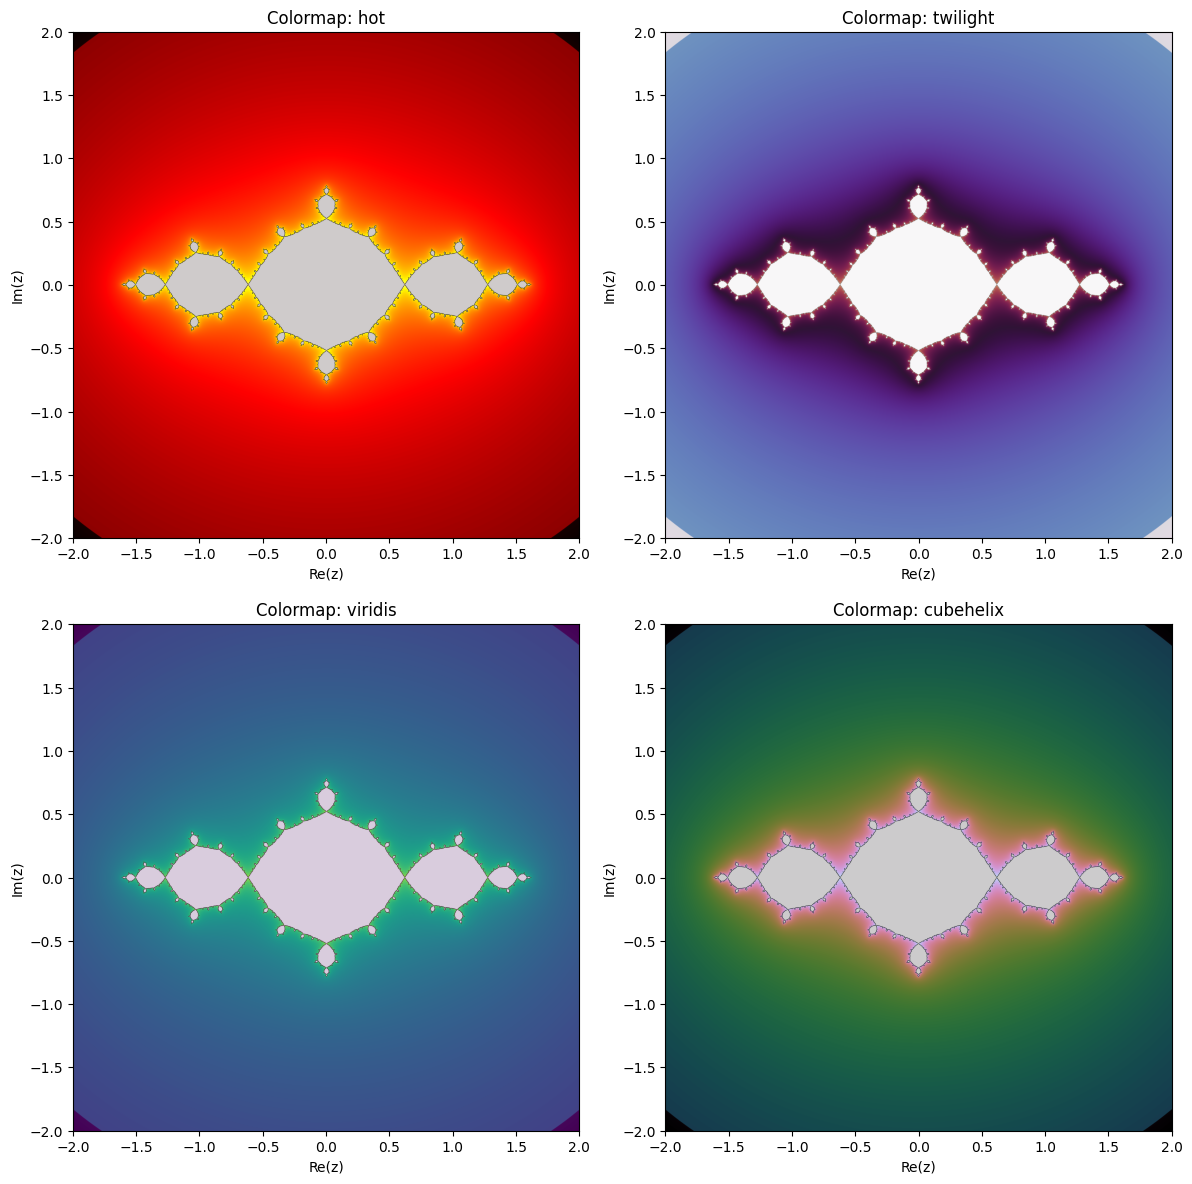

In [343]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def compute_julia_set(c, res=800, max_iter=256, xlim=2, ylim=2, escape_radius=1000):
    """
    Compute Julia set with smooth iteration count for better visualization.
    """
    x = np.linspace(-xlim, xlim, res)
    y = np.linspace(-ylim, ylim, res)
    X, Y = np.meshgrid(x, y)
    Z = X + Y*1j
    
    # Initialize arrays
    iterations = np.zeros(Z.shape, dtype=float)
    Z_iter = Z.copy()
    
    # Track which points haven't escaped
    mask = np.ones(Z.shape, dtype=bool)
    
    for i in range(max_iter):
        # Compute next iteration for points that haven't escaped
        Z_iter[mask] = Z_iter[mask]**2 + c
        
        # Check which points just escaped
        abs_Z = np.abs(Z_iter)
        just_escaped = mask & (abs_Z > escape_radius)
        
        # Smooth iteration count using normalized iteration count algorithm
        if np.any(just_escaped):
            # Formula: n + 1 - log(log(|z|)) / log(2)
            smooth_i = i + 1 - np.log(np.log(abs_Z[just_escaped])) / np.log(2)
            iterations[just_escaped] = smooth_i
            mask[just_escaped] = False
    
    # Points that never escaped
    iterations[mask] = 0
    
    return iterations, mask

def plot_julia_set(iterations, filled_mask, title="Julia Set"):
    """
    Plot Julia set with enhanced visualization.
    """
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    
    # Create a copy for visualization
    display_data = iterations.copy()
    
    # Apply logarithmic scaling to enhance structure visibility
    # Only apply to escaped points (non-zero values)
    escaped = display_data > 0
    if np.any(escaped):
        # Shift and normalize
        min_val = display_data[escaped].min()
        display_data[escaped] = display_data[escaped] - min_val + 1
        # Apply log scaling
        display_data[escaped] = np.log(display_data[escaped] + 1)
    
    # Normalize to [0, 1]
    if display_data.max() > 0:
        display_data = display_data / display_data.max()
    
    # Use a colormap that shows structure well
    # The article uses various colormaps; here's one that works well
    cmap = plt.cm.hot
    
    im = ax.imshow(display_data, cmap=cmap, origin='lower', extent=[-2, 2, -2, 2])
    
    # Optionally overlay the filled set in black
    filled_display = np.ma.masked_where(~filled_mask, np.ones_like(filled_mask))
    ax.imshow(filled_display, cmap='gray', vmin=0, vmax=1, 
              origin='lower', extent=[-2, 2, -2, 2], alpha=0.8)
    
    ax.set_xlabel('Re(z)', fontsize=12)
    ax.set_ylabel('Im(z)', fontsize=12)
    ax.set_title(title, fontsize=14)
    plt.colorbar(im, ax=ax, label='Escape iterations (log scale)')
    
    return fig, ax

# Example usage with different c values from the article
c_values = [
    -1.0 + 0.0j,      # Figure from the article
    -0.12 + 0.75j,    # Another classic value
    -0.4 + 0.6j,      # Interesting structure
    0.285 + 0.01j     # "Douady's rabbit"
]

# Compute and plot for c = -1 (as in your code)
c = -1.0 + 0.0j
print(f"Computing Julia set for c = {c}")

iterations, filled_mask = compute_julia_set(
    c, 
    res=3000,          # Higher resolution
    max_iter=256,     # More iterations
    xlim=2, 
    ylim=2,
    escape_radius=1000  # Higher escape radius for smoother gradients
)

fig, ax = plot_julia_set(iterations, filled_mask, f"Julia Set for c = {c}")
plt.tight_layout()
plt.show()

# Optional: Create a comparison plot with different colormaps
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
colormaps = ['hot', 'twilight', 'viridis', 'cubehelix']

display_data = iterations.copy()
escaped = display_data > 0
if np.any(escaped):
    min_val = display_data[escaped].min()
    display_data[escaped] = display_data[escaped] - min_val + 1
    display_data[escaped] = np.log(display_data[escaped] + 1)
if display_data.max() > 0:
    display_data = display_data / display_data.max()

for ax, cmap_name in zip(axes.flat, colormaps):
    ax.imshow(display_data, cmap=cmap_name, origin='lower', extent=[-2, 2, -2, 2])
    filled_display = np.ma.masked_where(~filled_mask, np.ones_like(filled_mask))
    ax.imshow(filled_display, cmap='gray', vmin=0, vmax=1, 
              origin='lower', extent=[-2, 2, -2, 2], alpha=0.8)
    ax.set_title(f'Colormap: {cmap_name}')
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')

plt.tight_layout()
plt.show()

Computing Julia set for c = (-1+0j)


/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2804902125.py:52: RuntimeWarning: divide by zero encountered in log
  distance = abs_Z_final * np.log(abs_Z_final) / abs_dZ_final
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2804902125.py:52: RuntimeWarning: invalid value encountered in multiply
  distance = abs_Z_final * np.log(abs_Z_final) / abs_dZ_final


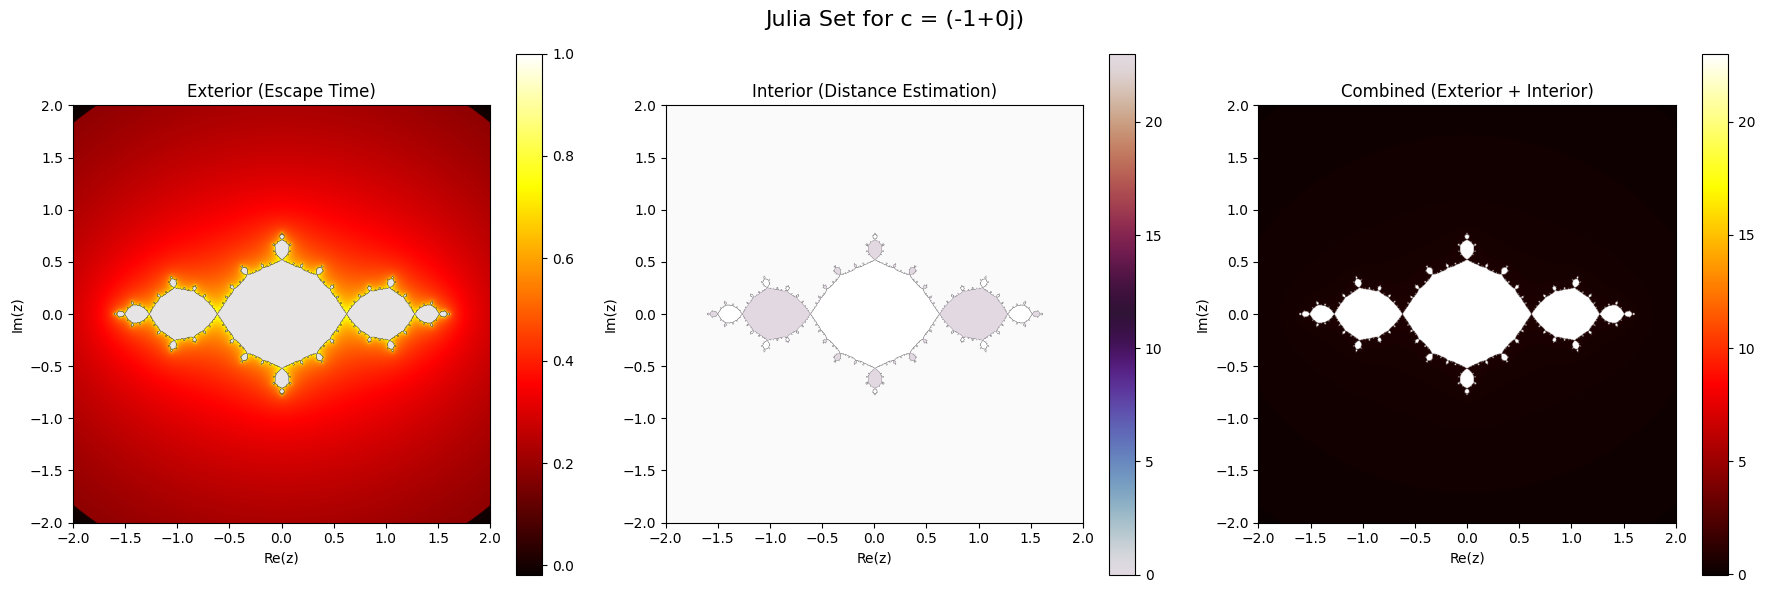

Computing orbit trap visualization...


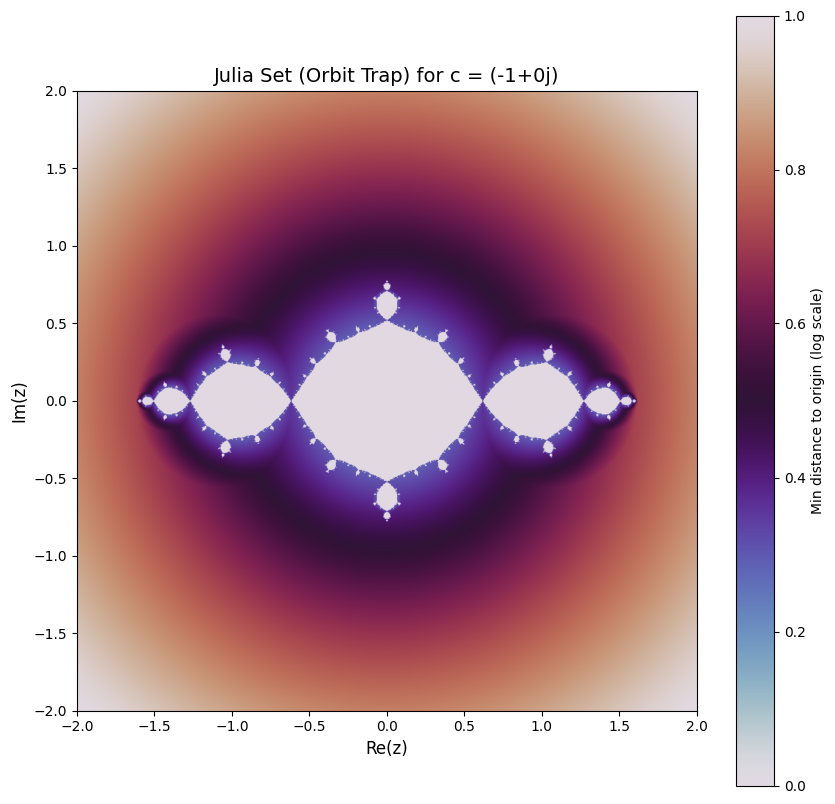


Computing Julia set for c = (-0.4+0.6j)


/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2804902125.py:55: RuntimeWarning: invalid value encountered in log
  interior_values[interior_mask] = -np.log(distance + 1e-10)


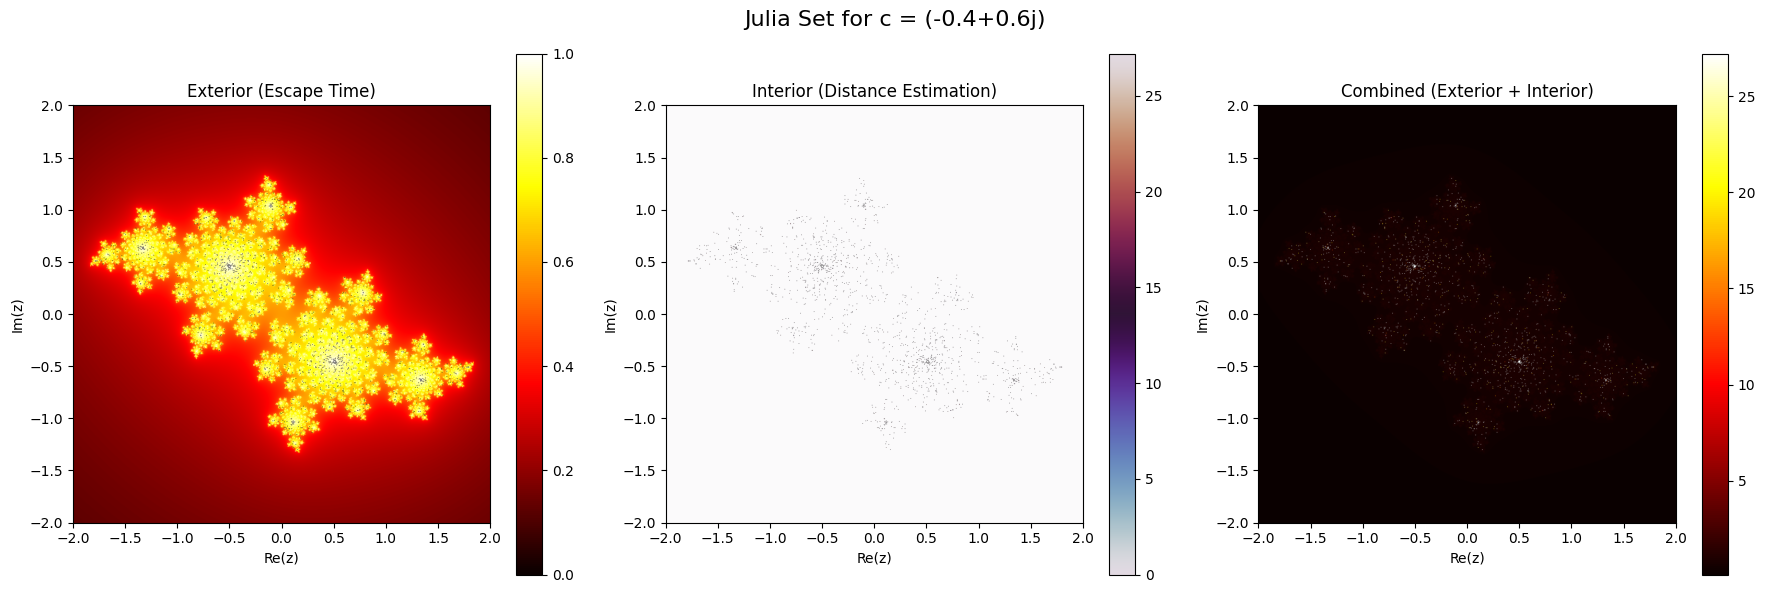

In [344]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def compute_julia_set_full(c, res=800, max_iter=256, xlim=2, ylim=2, escape_radius=1000):
    """
    Compute Julia set with both exterior (escape time) and interior (distance estimation) detail.
    """
    x = np.linspace(-xlim, xlim, res)
    y = np.linspace(-ylim, ylim, res)
    X, Y = np.meshgrid(x, y)
    Z = X + Y*1j
    
    # Initialize arrays
    exterior_values = np.zeros(Z.shape, dtype=float)
    interior_values = np.zeros(Z.shape, dtype=float)
    
    Z_iter = Z.copy()
    dZ_iter = np.ones(Z.shape, dtype=complex)  # Derivative for distance estimation
    
    # Track which points haven't escaped
    mask = np.ones(Z.shape, dtype=bool)
    
    for i in range(max_iter):
        # Update derivative: dZ = 2*Z*dZ (chain rule for z^2 + c)
        dZ_iter[mask] = 2 * Z_iter[mask] * dZ_iter[mask]
        
        # Compute next iteration for points that haven't escaped
        Z_iter[mask] = Z_iter[mask]**2 + c
        
        # Check which points just escaped
        abs_Z = np.abs(Z_iter)
        just_escaped = mask & (abs_Z > escape_radius)
        
        # Smooth iteration count for exterior
        if np.any(just_escaped):
            smooth_i = i + 1 - np.log(np.log(abs_Z[just_escaped])) / np.log(2)
            exterior_values[just_escaped] = smooth_i
            mask[just_escaped] = False
    
    # For points that never escaped (interior), compute distance estimation
    interior_mask = mask
    if np.any(interior_mask):
        # Distance estimation formula: |Z| * log|Z| / |dZ|
        abs_Z_final = np.abs(Z_iter[interior_mask])
        abs_dZ_final = np.abs(dZ_iter[interior_mask])
        
        # Avoid division by zero
        abs_dZ_final = np.maximum(abs_dZ_final, 1e-10)
        
        # Distance estimation
        distance = abs_Z_final * np.log(abs_Z_final) / abs_dZ_final
        
        # Use negative log for interior visualization (smaller distance = more detail)
        interior_values[interior_mask] = -np.log(distance + 1e-10)
    
    return exterior_values, interior_values, interior_mask

def compute_orbit_trap(c, res=800, max_iter=256, xlim=2, ylim=2, escape_radius=1000):
    """
    Compute orbit trap coloring (minimum distance to origin during iteration).
    """
    x = np.linspace(-xlim, xlim, res)
    y = np.linspace(-ylim, ylim, res)
    X, Y = np.meshgrid(x, y)
    Z = X + Y*1j
    
    min_dist = np.full(Z.shape, np.inf)
    Z_iter = Z.copy()
    mask = np.ones(Z.shape, dtype=bool)
    
    for i in range(max_iter):
        # Track minimum distance to origin
        current_dist = np.abs(Z_iter)
        min_dist = np.minimum(min_dist, current_dist)
        
        # Continue iteration
        Z_iter[mask] = Z_iter[mask]**2 + c
        
        # Check escape
        abs_Z = np.abs(Z_iter)
        escaped = abs_Z > escape_radius
        mask[escaped] = False
    
    return min_dist, ~mask

def plot_julia_combined(exterior, interior, interior_mask, title="Julia Set"):
    """
    Plot Julia set combining exterior and interior visualization.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=100)
    
    # Process exterior (escape time)
    exterior_display = exterior.copy()
    escaped = exterior_display > 0
    if np.any(escaped):
        min_val = exterior_display[escaped].min()
        exterior_display[escaped] = exterior_display[escaped] - min_val + 1
        exterior_display[escaped] = np.log(exterior_display[escaped] + 1)
    if exterior_display.max() > 0:
        exterior_display = exterior_display / exterior_display.max()
    
    # Process interior (distance estimation)
    interior_display = interior.copy()
    if np.any(interior_mask):
        # Normalize interior values
        int_vals = interior_display[interior_mask]
        if int_vals.max() > int_vals.min():
            interior_display[interior_mask] = (int_vals - int_vals.min()) / (int_vals.max() - int_vals.min())
    
    # Combined visualization
    combined = np.zeros_like(exterior_display)
    combined[~interior_mask] = exterior_display[~interior_mask]  # Exterior
    combined[interior_mask] = interior_display[interior_mask]  # Interior
    
    # Plot 1: Exterior only
    im1 = axes[0].imshow(exterior_display, cmap='hot', origin='lower', 
                         interpolation='bilinear', extent=[-2, 2, -2, 2])
    filled_display = np.ma.masked_where(~interior_mask, np.ones_like(interior_mask))
    axes[0].imshow(filled_display, cmap='gray', vmin=0, vmax=1, 
                   origin='lower', extent=[-2, 2, -2, 2], alpha=0.9)
    axes[0].set_xlabel('Re(z)')
    axes[0].set_ylabel('Im(z)')
    axes[0].set_title('Exterior (Escape Time)')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot 2: Interior only
    interior_cmap = plt.cm.twilight
    im2 = axes[1].imshow(interior_display, cmap=interior_cmap, origin='lower',
                         interpolation='bilinear', extent=[-2, 2, -2, 2])
    exterior_display_mask = np.ma.masked_where(interior_mask, np.ones_like(interior_mask))
    axes[1].imshow(exterior_display_mask, cmap='gray', vmin=0, vmax=1,
                   origin='lower', extent=[-2, 2, -2, 2], alpha=0.9)
    axes[1].set_xlabel('Re(z)')
    axes[1].set_ylabel('Im(z)')
    axes[1].set_title('Interior (Distance Estimation)')
    plt.colorbar(im2, ax=axes[1])
    
    # Plot 3: Combined
    im3 = axes[2].imshow(combined, cmap='hot', origin='lower',
                         interpolation='bilinear', extent=[-2, 2, -2, 2])
    axes[2].set_xlabel('Re(z)')
    axes[2].set_ylabel('Im(z)')
    axes[2].set_title('Combined (Exterior + Interior)')
    plt.colorbar(im3, ax=axes[2])
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    return fig, axes

def plot_orbit_trap(min_dist, interior_mask, title="Julia Set - Orbit Trap"):
    """
    Plot orbit trap coloring.
    """
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    
    # Apply log scaling for better visualization
    display_data = np.log(min_dist + 1)
    display_data = display_data / display_data.max()
    
    im = ax.imshow(display_data, cmap='twilight', origin='lower',
                   interpolation='bilinear', extent=[-2, 2, -2, 2])
    
    ax.set_xlabel('Re(z)', fontsize=12)
    ax.set_ylabel('Im(z)', fontsize=12)
    ax.set_title(title, fontsize=14)
    plt.colorbar(im, ax=ax, label='Min distance to origin (log scale)')
    
    return fig, ax

# Main computation
c = -1.0 + 0.0j
print(f"Computing Julia set for c = {c}")

# Method 1: Distance estimation (shows fractal structure inside)
exterior, interior, interior_mask = compute_julia_set_full(
    c, 
    res=800,
    max_iter=256,
    xlim=2, 
    ylim=2,
    escape_radius=1000
)

fig1, axes1 = plot_julia_combined(exterior, interior, interior_mask, 
                                    f"Julia Set for c = {c}")
plt.show()

# Method 2: Orbit trap (alternative interior coloring)
print("Computing orbit trap visualization...")
min_dist, filled_mask = compute_orbit_trap(
    c,
    res=800,
    max_iter=256,
    xlim=2,
    ylim=2,
    escape_radius=1000
)

fig2, ax2 = plot_orbit_trap(min_dist, filled_mask, 
                             f"Julia Set (Orbit Trap) for c = {c}")
plt.show()

# Try with a more interesting c value
c2 = -0.4 + 0.6j
print(f"\nComputing Julia set for c = {c2}")

exterior2, interior2, interior_mask2 = compute_julia_set_full(
    c2, 
    res=800,
    max_iter=256,
    xlim=1.5, 
    ylim=1.5,
    escape_radius=1000
)

fig3, axes3 = plot_julia_combined(exterior2, interior2, interior_mask2,
                                    f"Julia Set for c = {c2}")
plt.show()

Computing Julia set for c = (-1+0j)
This may take a moment with high resolution...


/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/1111120077.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap(base_cmap_name)


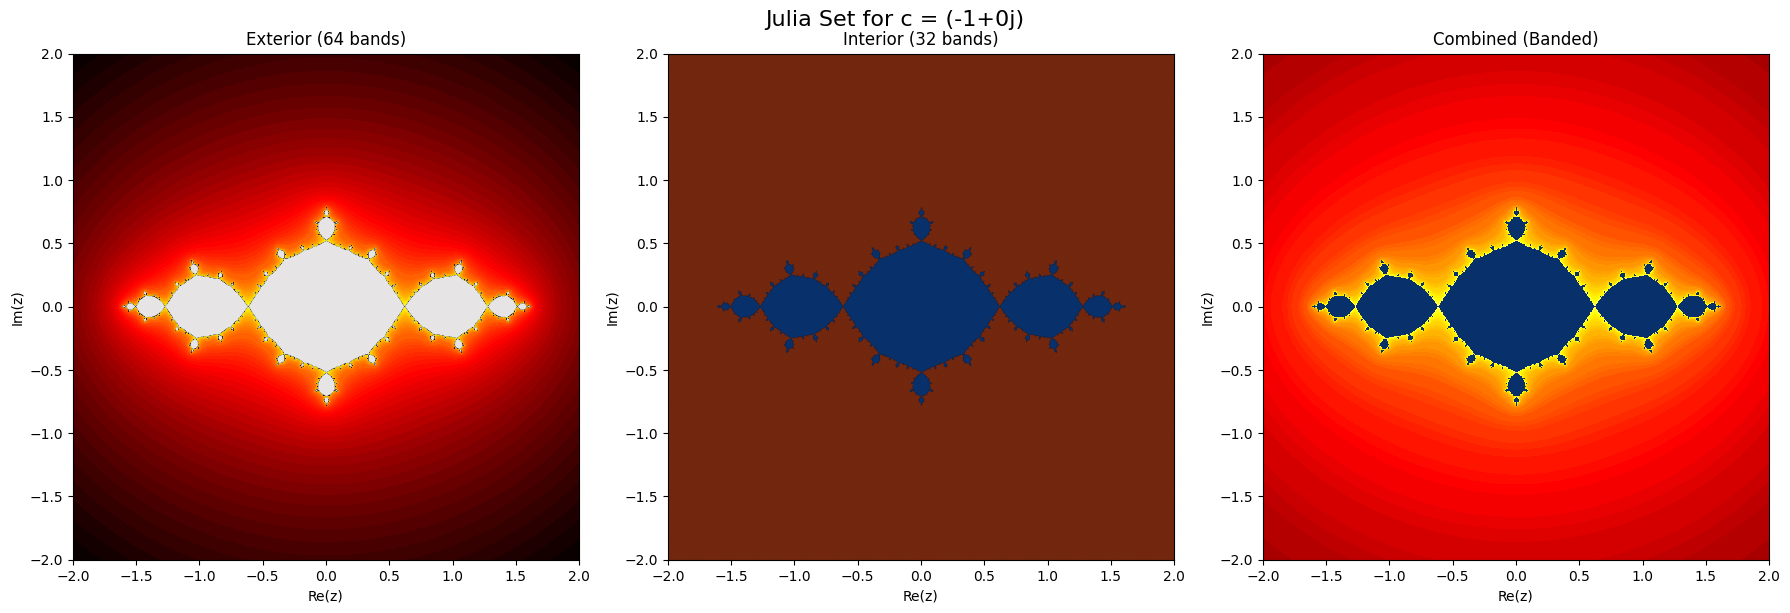


Creating version with different band counts...


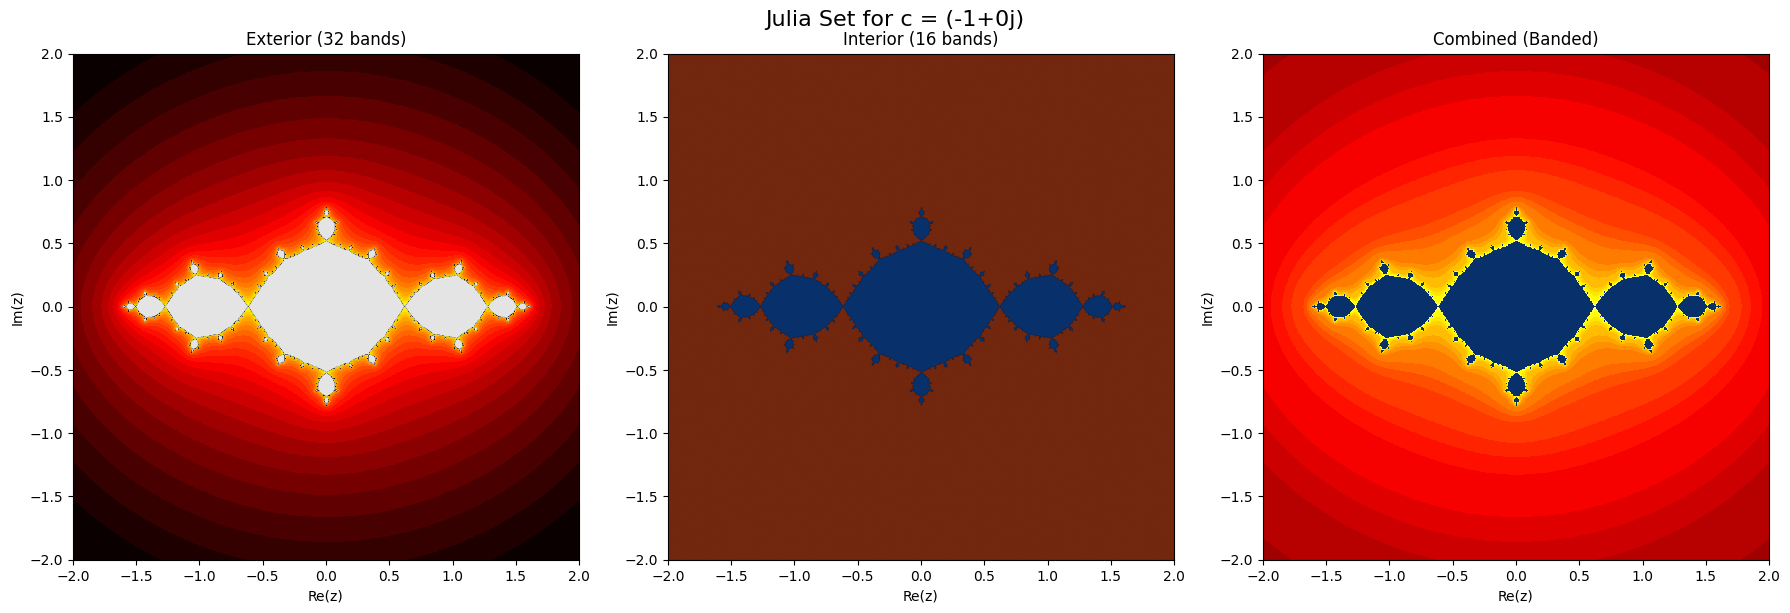


Computing Julia set for c = (-0.4+0.6j)


/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/1111120077.py:55: RuntimeWarning: invalid value encountered in log
  interior_values[interior_mask] = np.log(distance + 1e-10)


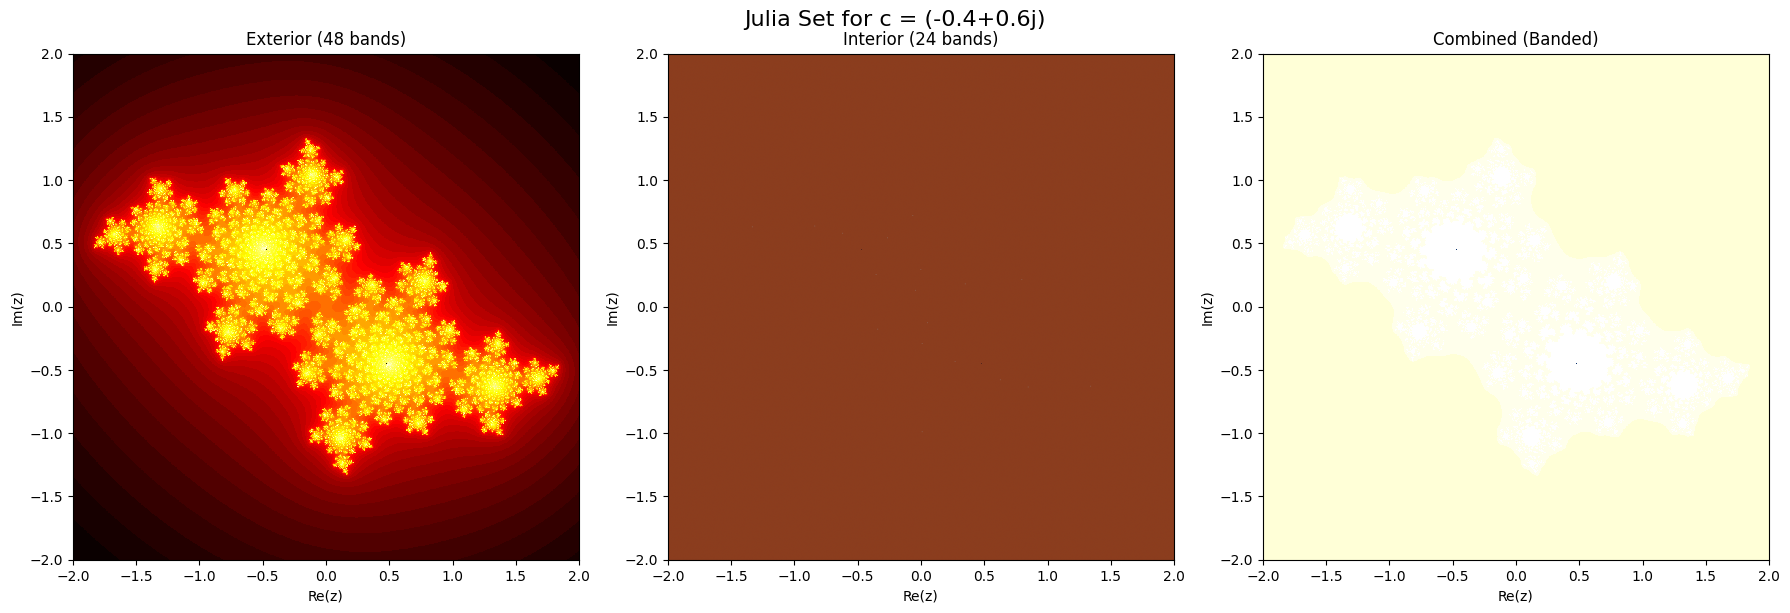


Tip: Adjust n_bands_ext and n_bands_int to control banding intensity
Adjust band_frequency in the code to control interior band spacing


In [345]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

def compute_julia_set_full(c, res=1200, max_iter=512, xlim=2, ylim=2, escape_radius=100):
    """
    Compute Julia set with both exterior (escape time) and interior (distance estimation) detail.
    """
    x = np.linspace(-xlim, xlim, res)
    y = np.linspace(-ylim, ylim, res)
    X, Y = np.meshgrid(x, y)
    Z = X + Y*1j
    
    # Initialize arrays
    exterior_values = np.zeros(Z.shape, dtype=float)
    interior_values = np.zeros(Z.shape, dtype=float)
    
    Z_iter = Z.copy()
    dZ_iter = np.ones(Z.shape, dtype=complex)  # Derivative for distance estimation
    
    # Track which points haven't escaped
    mask = np.ones(Z.shape, dtype=bool)
    
    for i in range(max_iter):
        # Update derivative: dZ = 2*Z*dZ (chain rule for z^2 + c)
        dZ_iter[mask] = 2 * Z_iter[mask] * dZ_iter[mask]
        
        # Compute next iteration for points that haven't escaped
        Z_iter[mask] = Z_iter[mask]**2 + c
        
        # Check which points just escaped
        abs_Z = np.abs(Z_iter)
        just_escaped = mask & (abs_Z > escape_radius)
        
        # Smooth iteration count for exterior
        if np.any(just_escaped):
            smooth_i = i + 1 - np.log(np.log(abs_Z[just_escaped])) / np.log(2)
            exterior_values[just_escaped] = smooth_i
            mask[just_escaped] = False
    
    # For points that never escaped (interior), compute distance estimation
    interior_mask = mask
    if np.any(interior_mask):
        abs_Z_final = np.abs(Z_iter[interior_mask])
        abs_dZ_final = np.abs(dZ_iter[interior_mask])
        
        # Avoid division by zero
        abs_dZ_final = np.maximum(abs_dZ_final, 1e-20)
        
        # Distance estimation formula
        distance = abs_Z_final * np.log(abs_Z_final + 1e-10) / abs_dZ_final
        
        # Take log of distance for better visualization
        # Use absolute value to handle negative logs
        interior_values[interior_mask] = np.log(distance + 1e-10)
    
    return exterior_values, interior_values, interior_mask

def create_banded_colormap(base_cmap_name, n_bands=32):
    """
    Create a stepped/banded colormap from a continuous one.
    """
    base_cmap = plt.cm.get_cmap(base_cmap_name)
    colors = base_cmap(np.linspace(0, 1, n_bands))
    return ListedColormap(colors)

def plot_julia_banded(exterior, interior, interior_mask, c, n_bands_ext=64, n_bands_int=32):
    """
    Plot Julia set with banded colors (not smooth gradients).
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=100)
    
    # === EXTERIOR PROCESSING ===
    exterior_display = exterior.copy()
    escaped = exterior_display > 0
    if np.any(escaped):
        # Apply log for detail
        min_val = exterior_display[escaped].min()
        exterior_display[escaped] = np.log(exterior_display[escaped] - min_val + 1)
    
    # Normalize to [0, 1]
    if exterior_display.max() > 0:
        exterior_display = exterior_display / exterior_display.max()
    
    # Quantize to create bands
    exterior_banded = np.floor(exterior_display * n_bands_ext) / n_bands_ext
    
    # === INTERIOR PROCESSING ===
    interior_display = interior.copy()
    if np.any(interior_mask):
        int_vals = interior_display[interior_mask]
        
        # Normalize interior values
        int_min, int_max = int_vals.min(), int_vals.max()
        if int_max > int_min:
            # Use modulo to create repeating bands
            normalized = (int_vals - int_min) / (int_max - int_min)
            
            # Create concentric bands - modulo creates repeating pattern
            # Multiply by a factor to control band frequency
            band_frequency = 20  # Higher = more bands
            interior_display[interior_mask] = np.abs(np.sin(normalized * band_frequency * np.pi))
    
    # Quantize interior to create discrete bands
    interior_banded = np.floor(interior_display * n_bands_int) / n_bands_int
    
    # === COMBINED VISUALIZATION ===
    combined = np.zeros_like(exterior_banded)
    combined[~interior_mask] = exterior_banded[~interior_mask]
    combined[interior_mask] = interior_banded[interior_mask]
    
    # Create banded colormaps
    ext_cmap = create_banded_colormap('hot', n_bands_ext)
    int_cmap = create_banded_colormap('Blues_r', n_bands_int)
    
    # Plot 1: Exterior with bands
    im1 = axes[0].imshow(exterior_banded, cmap=ext_cmap, origin='lower', 
                         interpolation='nearest', extent=[-2, 2, -2, 2])
    filled_display = np.ma.masked_where(~interior_mask, np.ones_like(interior_mask))
    axes[0].imshow(filled_display, cmap='gray', vmin=0, vmax=1, 
                   origin='lower', extent=[-2, 2, -2, 2], alpha=0.9)
    axes[0].set_xlabel('Re(z)')
    axes[0].set_ylabel('Im(z)')
    axes[0].set_title(f'Exterior ({n_bands_ext} bands)')
    
    # Plot 2: Interior with concentric bands
    im2 = axes[1].imshow(interior_banded, cmap=int_cmap, origin='lower',
                         interpolation='nearest', extent=[-2, 2, -2, 2])
    exterior_mask_display = np.ma.masked_where(interior_mask, np.ones_like(interior_mask))
    axes[1].imshow(exterior_mask_display, cmap='Oranges', vmin=0, vmax=1,
                   origin='lower', extent=[-2, 2, -2, 2], alpha=0.9)
    axes[1].set_xlabel('Re(z)')
    axes[1].set_ylabel('Im(z)')
    axes[1].set_title(f'Interior ({n_bands_int} bands)')
    
    # Plot 3: Combined with custom colormap
    # Create a combined colormap that transitions from blues (interior) to hot (exterior)
    colors_int = plt.cm.Blues_r(np.linspace(0, 1, n_bands_int))
    colors_ext = plt.cm.hot(np.linspace(0, 1, n_bands_ext))
    all_colors = np.vstack([colors_int, colors_ext])
    combined_cmap = ListedColormap(all_colors)
    
    # Rescale combined to use full colormap range
    combined_scaled = combined.copy()
    combined_scaled[interior_mask] = combined_scaled[interior_mask] * 0.5  # First half of colormap
    combined_scaled[~interior_mask] = 0.5 + combined_scaled[~interior_mask] * 0.5  # Second half
    
    im3 = axes[2].imshow(combined_scaled, cmap=combined_cmap, origin='lower',
                         interpolation='nearest', extent=[-2, 2, -2, 2])
    axes[2].set_xlabel('Re(z)')
    axes[2].set_ylabel('Im(z)')
    axes[2].set_title('Combined (Banded)')
    
    fig.suptitle(f'Julia Set for c = {c}', fontsize=16)
    plt.tight_layout()
    return fig, axes

# Main computation
c = -1.0 + 0.0j
print(f"Computing Julia set for c = {c}")
print("This may take a moment with high resolution...")

exterior, interior, interior_mask = compute_julia_set_full(
    c, 
    res=1200,        # Higher resolution for detail
    max_iter=512,    # More iterations
    xlim=2, 
    ylim=2,
    escape_radius=100  # Lower escape radius works better for banding
)

fig1, axes1 = plot_julia_banded(exterior, interior, interior_mask, c, 
                                  n_bands_ext=64, n_bands_int=32)
plt.show()

# Try different band counts
print("\nCreating version with different band counts...")
fig2, axes2 = plot_julia_banded(exterior, interior, interior_mask, c,
                                  n_bands_ext=32, n_bands_int=16)
plt.show()

# Try with a more interesting c value
c2 = -0.4 + 0.6j
print(f"\nComputing Julia set for c = {c2}")

exterior2, interior2, interior_mask2 = compute_julia_set_full(
    c2, 
    res=1200,
    max_iter=512,
    xlim=1.5, 
    ylim=1.5,
    escape_radius=100
)

fig3, axes3 = plot_julia_banded(exterior2, interior2, interior_mask2, c2,
                                  n_bands_ext=48, n_bands_int=24)
plt.show()

print("\nTip: Adjust n_bands_ext and n_bands_int to control banding intensity")
print("Adjust band_frequency in the code to control interior band spacing")

/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2998559570.py:31: RuntimeWarning: overflow encountered in multiply
  dZ = 2 * Z2 * dZ
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2998559570.py:6: RuntimeWarning: overflow encountered in multiply
  f = lambda z, c: z*z + c
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2998559570.py:31: RuntimeWarning: invalid value encountered in multiply
  dZ = 2 * Z2 * dZ
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2998559570.py:6: RuntimeWarning: invalid value encountered in multiply
  f = lambda z, c: z*z + c
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2998559570.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap('hot')


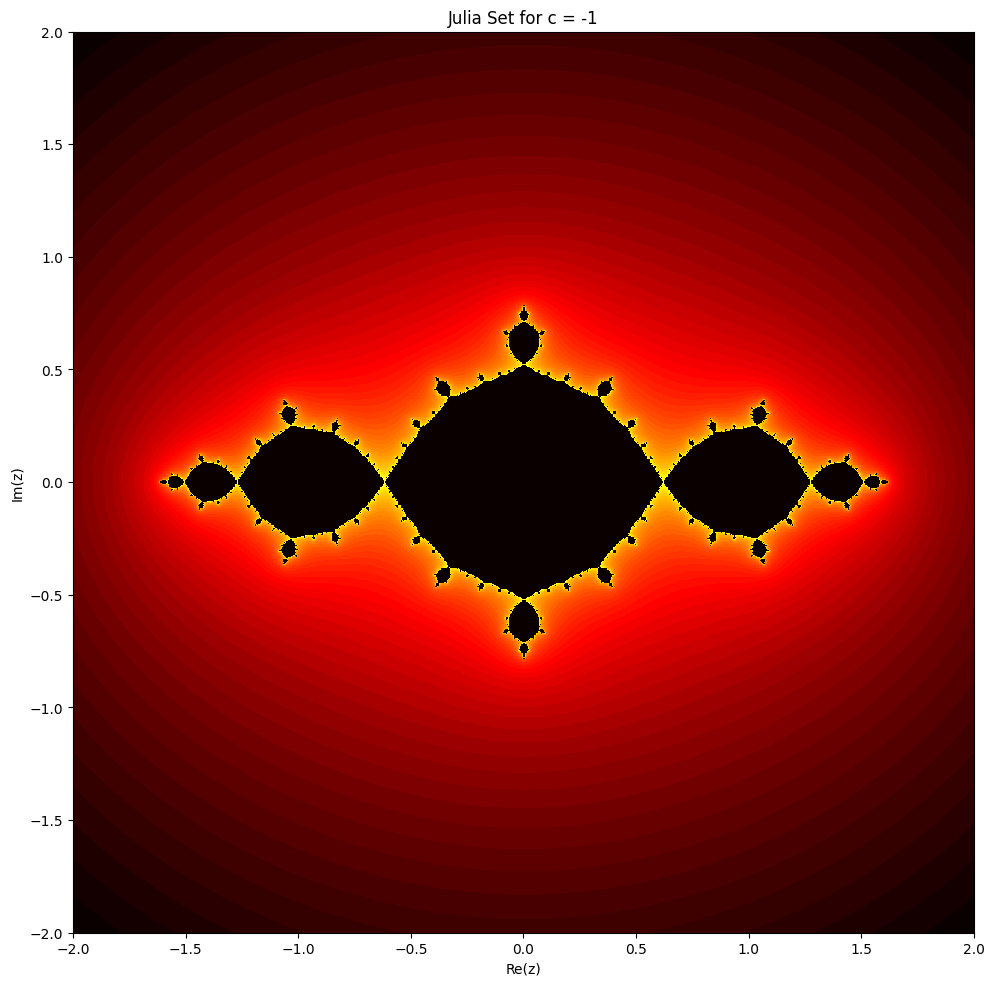

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# Parameters
f = lambda z, c: z*z + c
c = -1
res = 1200
max_iter = 512
xlim = 2
ylim = 2
escape_radius = 100
n_bands = 64  # Number of color bands

# Setup grid
x = np.linspace(-xlim, xlim, res)
y = np.linspace(-ylim, ylim, res)
X, Y = np.meshgrid(x, y)
Z = X + Y*1j

# Initialize arrays
exterior = np.full(Z.shape, max_iter, dtype=float)
interior = np.zeros(Z.shape, dtype=float)

# Iteration with derivative tracking
Z2 = Z.copy()
dZ = np.ones(Z.shape, dtype=complex)  # Derivative

for i in range(max_iter):
    # Update derivative (for distance estimation)
    dZ = 2 * Z2 * dZ
    
    # Iterate function
    Z2 = f(Z2, c)
    
    # Check escape
    radius_check = np.abs(Z2) <= escape_radius
    just_escaped = (exterior == max_iter) & (~radius_check)
    
    # Smooth iteration count for exterior
    if np.any(just_escaped):
        exterior[just_escaped] = i + 1 - np.log(np.log(np.abs(Z2[just_escaped]))) / np.log(2)

# Identify filled set
filled = (exterior == max_iter)

# Distance estimation for interior
if np.any(filled):
    abs_Z = np.abs(Z2[filled])
    abs_dZ = np.abs(dZ[filled])
    abs_dZ = np.maximum(abs_dZ, 1e-20)  # Avoid division by zero
    
    distance = abs_Z * np.log(abs_Z + 1e-10) / abs_dZ
    interior[filled] = np.log(distance + 1e-10)

# Process exterior: log scale and normalize
exterior_display = exterior.copy()
escaped = exterior_display < max_iter
if np.any(escaped):
    min_val = exterior_display[escaped].min()
    exterior_display[escaped] = np.log(exterior_display[escaped] - min_val + 1)
    exterior_display[escaped] = exterior_display[escaped] / exterior_display[escaped].max()

# Quantize exterior to create bands
exterior_banded = np.floor(exterior_display * n_bands) / n_bands

# Process interior: create concentric bands
interior_display = interior.copy()
if np.any(filled):
    int_vals = interior_display[filled]
    int_min, int_max = int_vals.min(), int_vals.max()
    
    if int_max > int_min:
        normalized = (int_vals - int_min) / (int_max - int_min)
        band_frequency = 20  # Controls number of concentric rings
        interior_display[filled] = np.abs(np.sin(normalized * band_frequency * np.pi))

# Quantize interior to create bands
interior_banded = np.floor(interior_display * (n_bands // 2)) / (n_bands // 2)

# Combine exterior and interior
combined = exterior_banded.copy()
combined[filled] = interior_banded[filled]

# Create banded colormap
base_cmap = plt.cm.get_cmap('hot')
colors = base_cmap(np.linspace(0, 1, n_bands))
banded_cmap = ListedColormap(colors)

# Plot
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.imshow(combined, cmap=banded_cmap, origin='lower', 
          interpolation='nearest', extent=[-xlim, xlim, -ylim, ylim])
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_title(f'Julia Set for c = {c}')
plt.tight_layout()
plt.show()

/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2673755119.py:31: RuntimeWarning: overflow encountered in multiply
  dZ = 2 * Z2 * dZ
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2673755119.py:6: RuntimeWarning: overflow encountered in multiply
  f = lambda z, c: z*z + c
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2673755119.py:31: RuntimeWarning: invalid value encountered in multiply
  dZ = 2 * Z2 * dZ
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2673755119.py:6: RuntimeWarning: invalid value encountered in multiply
  f = lambda z, c: z*z + c
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2673755119.py:54: RuntimeWarning: invalid value encountered in log
  interior[filled] = np.log(distance + 1e-10)
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_28969/2673755119.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.1

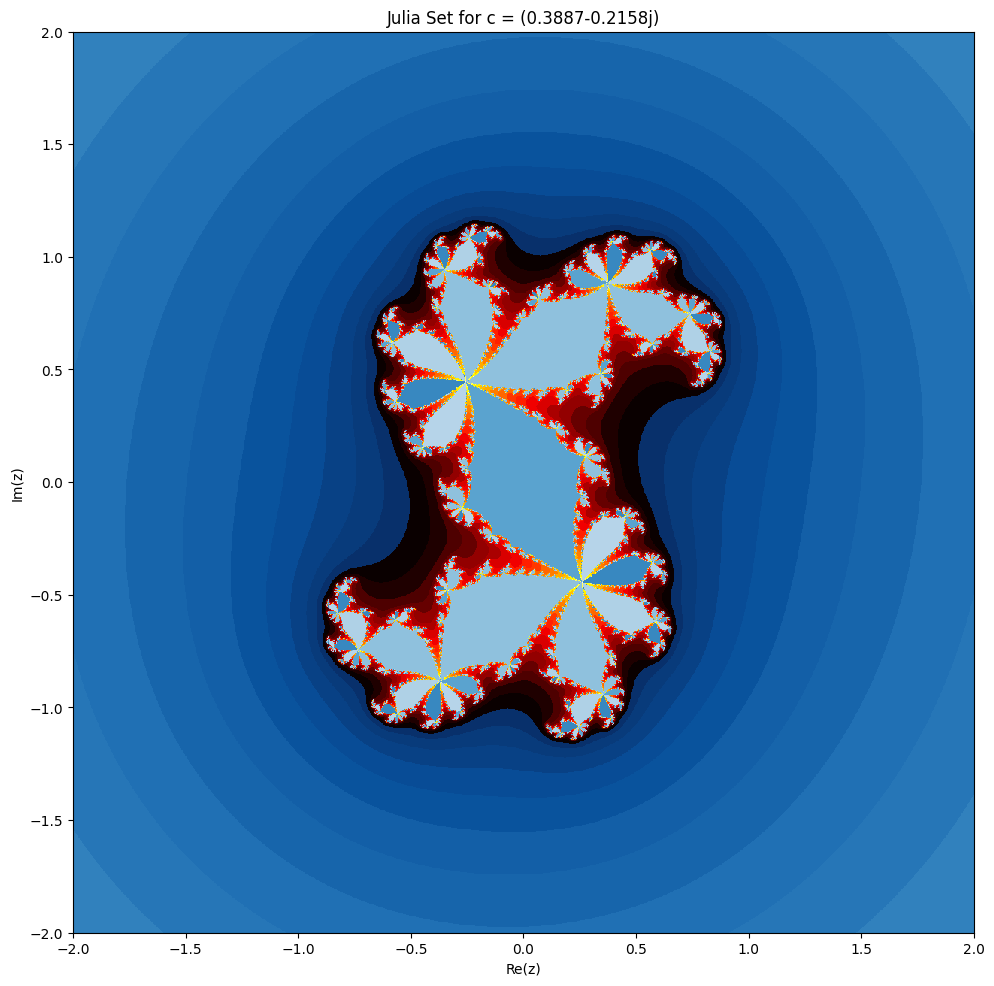

In [349]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# Parameters
f = lambda z, c: z*z + c
c = 0.3887 - 0.2158j
res = 1200
max_iter = 512
xlim = 2
ylim = 2
escape_radius = 100
n_bands = 30  # Number of color bands

# Setup grid
x = np.linspace(-xlim, xlim, res)
y = np.linspace(-ylim, ylim, res)
X, Y = np.meshgrid(x, y)
Z = X + Y*1j

# Initialize arrays
exterior = np.full(Z.shape, max_iter, dtype=float)
interior = np.zeros(Z.shape, dtype=float)

# Iteration with derivative tracking
Z2 = Z.copy()
dZ = np.ones(Z.shape, dtype=complex)  # Derivative

for i in range(max_iter):
    # Update derivative (for distance estimation)
    dZ = 2 * Z2 * dZ
    
    # Iterate function
    Z2 = f(Z2, c)
    
    # Check escape
    radius_check = np.abs(Z2) <= escape_radius
    just_escaped = (exterior == max_iter) & (~radius_check)
    
    # Smooth iteration count for exterior
    if np.any(just_escaped):
        exterior[just_escaped] = i + 1 - np.log(np.log(np.abs(Z2[just_escaped]))) / np.log(2)

# Identify filled set
filled = (exterior == max_iter)

# Distance estimation for interior
if np.any(filled):
    abs_Z = np.abs(Z2[filled])
    abs_dZ = np.abs(dZ[filled])
    abs_dZ = np.maximum(abs_dZ, 1e-20)  # Avoid division by zero
    
    distance = abs_Z * np.log(abs_Z + 1e-10) / abs_dZ
    interior[filled] = np.log(distance + 1e-10)

# Process exterior: log scale and normalize
exterior_display = exterior.copy()
escaped = exterior_display < max_iter
if np.any(escaped):
    min_val = exterior_display[escaped].min()
    exterior_display[escaped] = np.log(exterior_display[escaped] - min_val + 1)
    exterior_display[escaped] = exterior_display[escaped] / exterior_display[escaped].max()

# Quantize exterior to create bands
exterior_banded = np.floor(exterior_display * n_bands) / n_bands

# Process interior: create concentric bands using distance estimation
interior_display = interior.copy()
if np.any(filled):
    abs_Z = np.abs(Z2[filled])
    abs_dZ = np.abs(dZ[filled])
    abs_dZ = np.maximum(abs_dZ, 1e-20)
    
    # Distance to boundary
    distance = abs_Z * np.log(abs_Z + 1) / abs_dZ
    
    # Take negative log and use modulo for bands
    log_dist = -np.log(distance + 1e-10)
    
    # Use modulo to create repeating bands
    n_interior_bands = 40  # Number of concentric rings
    interior_display[filled] = (log_dist * n_interior_bands) % 1.0

# Quantize interior to create sharp bands
interior_banded = np.floor(interior_display * 32) / 32

# Combine exterior and interior
combined = exterior_banded.copy()
combined[filled] = interior_banded[filled]

# Create colormaps - use Blues for interior, hot for exterior
interior_cmap = plt.cm.get_cmap('Blues')
exterior_cmap = plt.cm.get_cmap('hot')

# Combine colormaps
interior_colors = interior_cmap(np.linspace(0.3, 1, 32))  # Skip very light blues
exterior_colors = exterior_cmap(np.linspace(0, 1, n_bands))
all_colors = np.vstack([interior_colors, exterior_colors])
combined_cmap = ListedColormap(all_colors)

# Scale combined image to use both parts of colormap
combined_scaled = combined.copy()
combined_scaled[filled] = combined[filled] * 0.3  # Map interior to first 30% of colormap
combined_scaled[~filled] = 0.3 + combined[~filled] * 0.7  # Map exterior to last 70%

# Plot
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.imshow(combined_scaled, cmap=combined_cmap, origin='lower', 
          interpolation='nearest', extent=[-xlim, xlim, -ylim, ylim])
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_title(f'Julia Set for c = {c}')
plt.tight_layout()
plt.show()